In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv('Salary_Data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [5]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [6]:
df.shape

(30, 2)

In [7]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [8]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [10]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

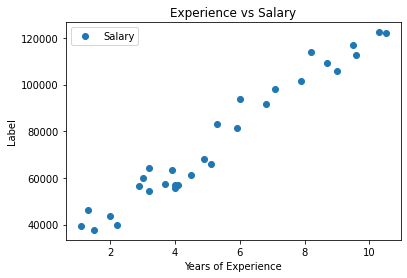

In [11]:
df.plot(x = "YearsExperience" , y = "Salary", style = 'o')
plt.xlabel("Years of Experience")
plt.ylabel("Label")
plt.title("Experience vs Salary")
plt.show()

In [12]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [13]:
#Train-Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

In [14]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(22, 1) (8, 1) (22,) (8,)


In [15]:
# Model Building
from sklearn.linear_model import LinearRegression

In [16]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
#Prediction
y_pred = regressor.predict(X_test)

In [18]:
df1 = pd.DataFrame({"Actual": y_test, "Prdeicted": y_pred})
df1

,Actual,Prdeicted
0,37731.0,41056.257055
1,122391.0,123597.709384
2,57081.0,65443.504334
3,63218.0,63567.562235
4,116969.0,116093.940990
5,109431.0,108590.172597
6,112635.0,117031.912039
7,55794.0,64505.533285


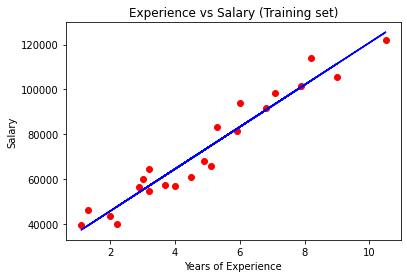

In [19]:
# Visualising the trainging set
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary (Training set)")
plt.show()

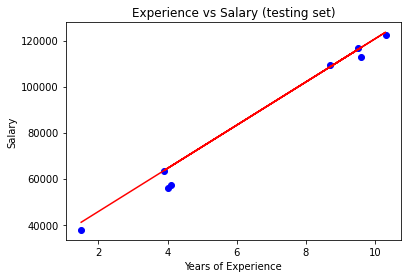

In [20]:
# Visualising the Testing set
plt.scatter(X_test,y_test,color = 'blue')
plt.plot(X_test, regressor.predict(X_test), color = 'red')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary (testing set)")
plt.show()

In [21]:
from sklearn import metrics

In [23]:
print("r2 score : ", metrics.r2_score(y_test,y_pred))

r2 score :  0.9779208335417602
